# Vehicle Routing Problem Using PuLP Python Library

## Installing Required Modules

In [1]:
! pip install pulp

     |████████████████████████████████| 14.2 MB 23.3 MB/s 


In [1]:
import random
import itertools
import numpy as np
import pandas as pd
from pulp import *
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
bus_stops_df = pd.read_csv('/Users/AnasSuffo/OneDrive/Python/uni/ML_Lab/Data/unique_bus_stops_ll.csv')

In [3]:
bus_stops_df

,element_type,osmid,name,x,y
0,node,112147966,Abzweigung Bennerstedt,10.486970,53.314646
1,node,185936288,Lüneburger Straße,10.522701,53.228851
2,node,260372699,"Karze, An den Hauskoppeln",10.673987,53.314295
3,node,270544778,Universitätsallee,10.405261,53.230091
4,node,275961621,"Artlenburg, Grünstraße",10.492180,53.371934
...,...,...,...,...,...
662,node,7947700409,Laave Dorf,11.068376,53.218722
663,node,9005254482,"Diersbüttel, Haus Nr.15",10.257986,53.100508
664,node,9005254484,Bockum,10.203350,53.090665
665,node,9181347107,Laave Siedlung,11.044969,53.238832


In [4]:
distances_df = pd.read_csv('/Users/AnasSuffo/OneDrive/Python/uni/ML_Lab/Data/distance_matrix.csv')

In [5]:
distances_df

,name,Abzweigung Bennerstedt,Lüneburger Straße,"Karze, An den Hauskoppeln",Universitätsallee,"Artlenburg, Grünstraße",Bitter,Zeetze I,Stapel II,Rosien I,...,"Rassau, Abzweig",Pinnau,Tripkau,Darchau,"Oldendorf (Luhe), Abzw. Wohlenbüttel",Laave Dorf,"Diersbüttel, Haus Nr.15",Bockum,Laave Siedlung,Kaarßen Ausbau
0,Abzweigung Bennerstedt,0.000,11506.145,16542.898,14099.228,9009.327,37638.071,35480.616,32141.784,32141.784,...,39414.412,39414.412,39414.412,32141.784,32564.139,39414.412,34546.418,37115.240,35480.616,39414.412
1,Lüneburger Straße,11506.019,0.000,16606.675,9691.399,20515.346,27020.816,27067.203,27812.085,27812.085,...,28797.157,28797.157,28797.157,27812.085,27419.307,28797.157,27582.845,31517.621,27067.203,28797.157
2,"Karze, An den Hauskoppeln",16542.898,16606.675,0.000,23934.566,18008.067,25664.215,20862.517,16936.110,16936.110,...,25581.052,25581.052,25581.052,16936.110,42399.477,25581.052,43699.732,46580.115,20862.517,25581.052
3,Universitätsallee,14127.351,9691.050,24041.254,0.000,17878.271,36510.590,36556.977,36498.547,36498.547,...,38286.931,38286.931,38286.931,36498.547,18464.911,38286.931,20447.190,23016.012,36556.977,38286.931
4,"Artlenburg, Grünstraße",8993.760,20499.905,17996.791,17862.704,0.000,43661.006,38859.308,34932.901,34932.901,...,43577.843,43577.843,43577.843,34932.901,36319.026,43577.843,38301.305,40870.127,38859.308,43577.843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Laave Dorf,39430.522,28813.393,25557.628,38303.516,43565.695,4817.061,7633.805,13095.731,13095.731,...,0.000,0.000,0.000,13095.731,56031.424,0.000,56194.962,60129.738,7633.805,0.000
663,"Diersbüttel, Haus Nr.15",34603.240,27543.326,43805.404,20475.889,38354.160,54362.866,54409.253,55154.135,55154.135,...,56139.207,56139.207,56139.207,55154.135,6658.777,56139.207,0.000,4975.621,54409.253,56139.207
664,Bockum,37182.744,31309.505,46740.186,23055.393,40933.664,58129.045,58175.432,58920.314,58920.314,...,59905.386,59905.386,59905.386,58920.314,6636.979,59905.386,4975.621,0.000,58175.432,59905.386
665,Laave Siedlung,35480.623,27097.272,20839.093,36587.395,38847.160,7716.968,0.000,8377.196,8377.196,...,7633.805,7633.805,7633.805,8377.196,54315.303,7633.805,54478.841,58413.617,0.000,7633.805


In [6]:
distances_array = distances_df.iloc[:,1:].values

In [7]:
distances_array

array([[    0.   , 11506.145, 16542.898, ..., 37115.24 , 35480.616,
        39414.412],
       [11506.019,     0.   , 16606.675, ..., 31517.621, 27067.203,
        28797.157],
       [16542.898, 16606.675,     0.   , ..., 46580.115, 20862.517,
        25581.052],
       ...,
       [37182.744, 31309.505, 46740.186, ...,     0.   , 58175.432,
        59905.386],
       [35480.623, 27097.272, 20839.093, ..., 58413.617,     0.   ,
         7633.805],
       [39430.522, 28813.393, 25557.628, ..., 60129.738,  7633.805,
            0.   ]])

## Defining the Mathematical Problem (Minimal Solution)

### Objective Function

Minimizing the distance travelled by the bus:

min $\sum_{b = 1}^B \sum_{(i,j) \in N} x_{(i,j)}^b * d_{i,j}$

### Decision Variables

Bus $b$ has taken route (edge) $a_{(i,j)} = (i,j)$:

$x_{(i,j)}^b \in \{0, 1\}$

Bus $b$ stops at node $n$:

$z_n^b \in \{0, 1\}$

### Constraints

More than one visit per bus $b$ per node $i$:

$\sum_{b = 1}^B \sum_{i \in N, i \neq j} x_{(i,j)}^b >= 1$, $\forall j \in N \setminus \{D\}$

Departure from (and Arrival at) Depot $D$:

$\sum_{j \in N \setminus \{D\}} x_{Dj}^b == 1$, $\forall b \in B$

$\sum_{i \in N \setminus \{D\}} x_{iD}^b == 1$, $\forall b \in B$

Final Destination $T$ Last Stop before Depot:

$x_{TD}^b == 1$, $\forall b \in B$

Flow Conservation Constraint: Number of buses coming in and out of a node $i$ is the same

$\sum_{i \in N, i \neq j} x_{(i,j)}^b - \sum_{i \in N} x_{(j,i)}^b == 0$, $\forall j \in N, \forall b \in B$

All people $p$ at bus stop $h$ are being picked up by any bus $b$:

$\sum_{b = 1}^B z_h^b * s_b^b == p_h$, $\forall h \in H$

Removal of Subtours:

$\sum_{b = 1}^B \sum_{(i,j) \in S, i \neq j} x_{(i,j)}^b \leq |S| - 1$, $S \subseteq N \setminus \{D\}$

Constraint for Decision Variables:

$x_{(i,j)}^b \in \{0,1\}$, $\forall b \in B, \forall (i,j) \in A$

$z_n^b \in \{0, 1\}$, $\forall b \in B, \forall n \in N$

## Implementing the Mathematical Problem (Minimal Solution)

#### Definition of the Variables

In [8]:
# number of bus stations (0 is depot and the last one is the destination)
stop_count = 12

# number of buses
bus_count = 1

# number of maximum passengers per bus stop
passenger_count = 10

In [9]:
numbers = list(np.random.randint(0, distances_array.shape[0], size=stop_count))

In [10]:
distances_array_sel = distances_array[numbers,:]
distances_array_sel = distances_array_sel[:, numbers]

In [11]:
distances_array_sel[stop_count-1, 0] = 0

In [12]:
distances_array_sel

array([[    0.   , 24869.796, 22842.165,  2624.401,  6989.393,  7240.319,
        31935.238,  5971.76 , 15056.908, 15560.768, 33273.306,  7829.81 ],
       [24801.607,     0.   ,  4500.99 , 22339.186, 28244.542, 30058.455,
         9602.189, 20282.075, 11703.33 ,  9757.719, 15449.863, 29765.744],
       [22773.976,  4500.99 ,     0.   , 20311.555, 26325.317, 28030.824,
         9668.615, 18254.444, 12979.238,  7730.088, 13752.528, 27738.113],
       [ 2662.893, 22468.933, 20441.302,     0.   ,  6383.264,  7924.836,
        29534.375,  3570.897, 12656.045, 13159.905, 30689.89 ,  7796.06 ],
       [ 7022.937, 28405.006, 26377.375,  6378.316,     0.   ,  8410.843,
        35470.448,  9506.97 , 16813.382, 19095.978, 37068.206,  6000.053],
       [ 7222.087, 30170.231, 28142.6  ,  7924.836,  8423.158,     0.   ,
        37235.673, 11272.195, 20357.343, 20861.203, 37768.805,  8209.714],
       [31882.024,  9569.872,  9668.615, 29419.603, 35433.365, 37138.872,
            0.   , 27362.492, 20

In [13]:
bus_stops_sel = bus_stops_df.iloc[numbers]

In [14]:
demand = list(np.random.randint(1, passenger_count, stop_count))
demand[0] = 0
demand[stop_count-1] = 0

bus_stops_sel['demand'] = demand

<ipython-input-14-f256508c08a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_stops_sel['demand'] = demand


In [15]:
bus_stops_sel

,element_type,osmid,name,x,y,demand
15,node,304485122,Graf-von-Moltke-Straße,10.438544,53.237269,0
366,node,1801577708,Marschweg,10.720181,53.297112,2
444,node,2936577452,"Breetze, Bokelstraße",10.709379,53.264648,1
152,node,471796360,Hagen-Schule,10.447364,53.244064,7
67,node,386915979,Imkerstieg,10.388762,53.274634,7
84,node,411085018,Pilgerpfad,10.378393,53.209902,7
564,node,4487714196,Gülstorf Abzw.,10.845886,53.264528,5
317,node,1195426701,Otto-Brenner-Straße,10.478437,53.242305,6
508,node,3366247106,Neumühlen bei Rullstorf,10.585835,53.287492,7
43,node,323130841,Neetzebrücke,10.615070,53.265062,6


#### Defining the Decision Variables

In [16]:
# decision variables (0/1) are already constrained by function definition

# variable x indicating whether bus b has taken route (i,j)
x = [[[LpVariable("x%s_%s,%s"%(i,j,b), cat="Binary") if i != j else None
                                                     for b in range(bus_count)]
                                                     for j in range(stop_count)]
                                                     for i in range(stop_count)]

# variable z indicating whether bus b stops at bus stop n
#z = LpVariable.dicts('z', ((n,b) for n in range(stop_count) for b in range(bus_count)), cat='Binary')

#### Setting the Problem and the Objective Function

In [17]:
# definition of LpProblem instance
problem = LpProblem("CVRP", LpMinimize)

# define Objective Function
problem += lpSum(distances_array_sel[i][j] * x[i][j][b] if i != j else 0
                 for b in range(bus_count)
                 for i in range(stop_count) 
                 for j in range(stop_count))

#### Setting Constraints

In [18]:
# one or more visit per bus per bus stop
for j in range(1, stop_count):
    problem += lpSum(x[i][j][b] if i != j else 0 
                     for i in range(stop_count) 
                     for b in range(bus_count)) >= 1

# departure from (and return to) depot and final destination as last point before depot
for b in range(bus_count):
    problem += lpSum(x[0][j][b] for j in range(1,stop_count)) == 1
    problem += lpSum(x[i][0][b] for i in range(1,stop_count)) == 1
    problem += x[stop_count-1][0][b] == 1

# number of buses coming in and out of a node are the same
for b in range(bus_count):
    for j in range(stop_count):
        problem += lpSum(x[i][j][b] if i != j else 0 
                         for i in range(stop_count)) -  lpSum(x[j][i][b] for i in range(stop_count)) == 0

# removal of subtours (up to 12 stop points working)
subtours = []
for i in range(2,stop_count):
      subtours += combination(range(1,stop_count), i)
for s in subtours:
    problem += lpSum(x[i][j][b] if i !=j else 0 for i, j in permutation(s,2) for b in range(bus_count)) <= len(s) - 1

#### Solving the Problem

In [19]:
status = problem.solve()

In [20]:
# output status, value of objective function
status, LpStatus[status], value(problem.objective)

(1, 'Optimal', 101151.14700000001)

#### Plot Solution

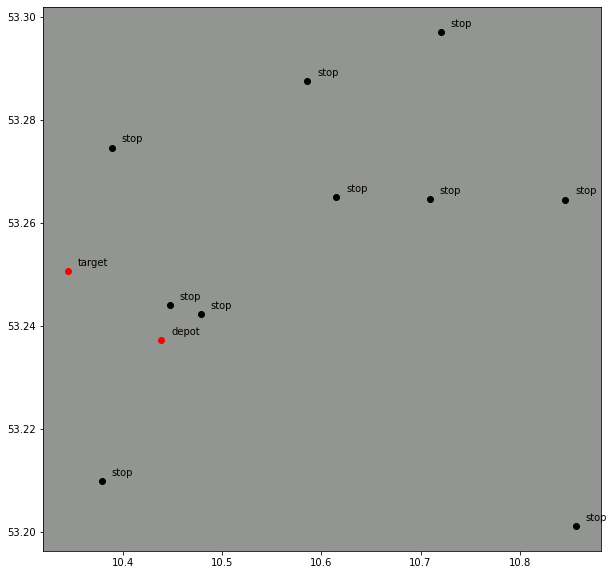

In [21]:
index_list = list(bus_stops_sel.index)

plt.figure(figsize=(10, 10))

ax = plt.axes()
ax.set_facecolor('xkcd:grey')

# draw problem state
for i, row in bus_stops_sel.iterrows():
    if i == index_list[0]:
        plt.scatter(row['x'], row['y'], c='r')
        plt.text(row['x'] + 0.01, row['y'] + 0.001, 'depot')
    elif i == index_list[stop_count-1]:
        plt.scatter(row['x'], row['y'], c='r')
        plt.text(row['x'] + 0.01, row['y'] + 0.001, 'target')
    else:
        plt.scatter(row['x'], row['y'], c='black')
        # demand = row['demand']
        plt.text(row['x'] + 0.01, row['y'] + 0.001, 'stop')
plt.show()

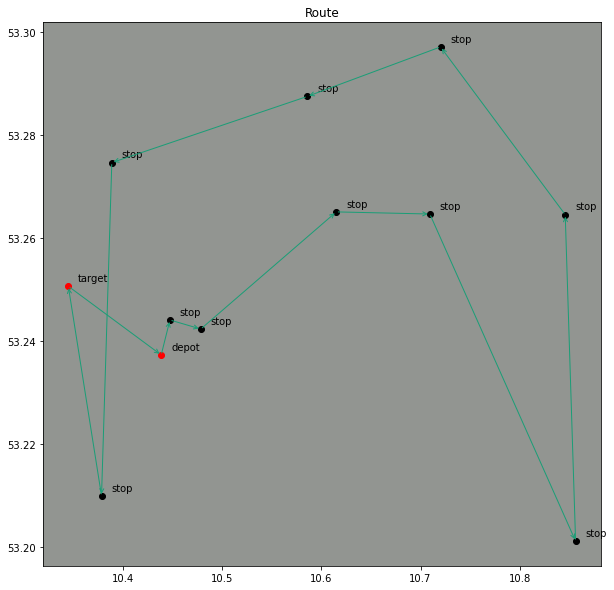

In [22]:
plt.figure(figsize=(10, 10))

ax = plt.axes()
ax.set_facecolor('xkcd:grey')

# draw problem state
for i, row in bus_stops_sel.iterrows():
    if i == index_list[0]:
        plt.scatter(row['x'], row['y'], c='r')
        plt.text(row['x'] + 0.01, row['y'] + 0.001, 'depot')
    elif i == index_list[stop_count-1]:
        plt.scatter(row['x'], row['y'], c='r')
        plt.text(row['x'] + 0.01, row['y'] + 0.001, 'target')
    else:
        plt.scatter(row['x'], row['y'], c='black')
        # demand = row['demand']
        plt.text(row['x'] + 0.01, row['y'] + 0.001, 'stop')
        
#plt.xlim([5, 15])
#plt.ylim([50, 60])
plt.title('Route')

# draw optimal route
cmap = plt.get_cmap('Dark2')

routes = []
for b in range(bus_count):
    bus_route = [(i,j) for i in range(stop_count) for j in range(stop_count) if i != j and value(x[i][j][b]) == 1]
    routes.append(bus_route)

    # draw for each vehicle
    arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor=cmap(b))
    for i, j in bus_route:
        plt.annotate('', xy=[bus_stops_sel.iloc[j]['x'], bus_stops_sel.iloc[j]['y']], xytext=[bus_stops_sel.iloc[i]['x'], bus_stops_sel.iloc[i]['y']], arrowprops=arrowprops)
                
plt.show()

In [26]:
routes

[[(0, 13),
  (1, 3),
  (2, 18),
  (3, 8),
  (4, 7),
  (5, 19),
  (6, 16),
  (7, 1),
  (8, 14),
  (9, 2),
  (10, 11),
  (11, 4),
  (12, 9),
  (13, 15),
  (14, 17),
  (15, 6),
  (16, 12),
  (17, 5),
  (18, 10),
  (19, 0)]]